In [3]:
import torch
import torch.nn.functional as F
import seaborn as sns
from torch import Tensor

from taker import Model
import random
import string
from datetime import datetime

In [4]:

id = 1

In [16]:
m = Model("nickypro/tinyllama-110M")

/usr/local/share/miniconda/envs/mistral2/lib/python3.9/site-packages/taker/model.py:136: UserWarning: Model nickypro/tinyllama-110M not tested.
  warnings.warn( f"Model {model_repo} not tested." )
/usr/local/share/miniconda/envs/mistral2/lib/python3.9/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


- Loaded nickypro/tinyllama-110M
 - Registered 12 Attention Layers


In [6]:
prompts = [
    "A young dragon who can't breathe fire goes on a quest to find a magical cure.",
    "A group of animals start a detective agency in the forest to solve mysteries.",
    "A child with the power to talk to plants helps save the garden from a drought.",
    "Two siblings discover a secret door in their attic leading to a magical kingdom.",
    "A pirate ship crewed entirely by cats searches for the legendary Fish Island.",
    "A young witch struggles to control her powers while preparing for the annual magic festival.",
    "A robot befriends a lonely child and they embark on adventures in the city.",
    "An enchanted book transports a reader to the world within its pages for an adventure.",
    "A squirrel with amnesia tries to uncover its past with the help of forest friends.",
    "A knight in training must complete a quest to earn their armor, facing various challenges.",
    "A space explorer lands on a planet inhabited by alien creatures and learns about their culture.",
    "A magical bakery where the sweets grant wishes, but not always in the way the customer expects.",
    "A group of kids with superpowers form a team to protect their town from villains.",
    "A mermaid ventures onto land to find a lost treasure and learns about human customs.",
    "A time traveler visits various historical events, trying to fix a mistake without changing history.",
    "A young inventor creates a gadget that can change the weather, leading to unexpected adventures.",
    "An alien child stranded on Earth navigates school life while hiding their true identity.",
    "A ghost detective helps solve ghostly mysteries while uncovering the story of their own past.",
    "A magical zoo where the animals talk and the keeper learns lessons about friendship and courage.",
    "A fairy with broken wings learns the value of perseverance and finds a new way to fly.",
    "A brave knight embarks on a quest to defeat a powerful dragon and save a kingdom.",
    "A group of friends embark on a journey to the center of the earth, facing challenges and uncovering ancient secrets.",
    "A young wizard discovers a magical artifact that can turn any metal into gold.",
    "A team of explorers ventures into the depths of an ancient temple, encountering ancient beings and solving puzzles.",
    "A princess with a special gift must find a prince who can love her for what she is, facing challenges and making choices along the way.",
    "A detective with the ability to see into people's dreams investigates a series of unsolved murders.",
    "A group of friends embark on a quest to find a mythical creature that can grant wishes, facing danger and making new friends along the way.",
    "A prince with a special gift must find a princess who can love him for who he is, facing challenges and making choices along the way.",
    "A group of friends embark on a quest to find a mythical creature that can grant wishes, facing danger and making new friends along the way.",
    "A young prince embarks on a quest to defeat a powerful wizard and save his kingdom.",
    "A group of friends embark on a journey to the heart of the universe, facing challenges and uncovering cosmic secrets.",
    "A young witch discovers a magical artifact that can turn any substance into solid ice.",
    "A team of adventurers ventures into the depths of a mythical forest, encountering mythical beings and solving riddles.",
    "A princess with a special gift must find a prince who can love her for her unique beauty, facing challenges and making choices along the way.",
    "A detective with the ability to read people's minds investigates a series of unsolved crimes.",
    "A group of friends embark on a quest to find a mythical creature that can grant wishes, facing danger and making new friends along the way.",
    "A prince with a special gift must find a princess who can love him for his unique charisma, facing challenges and making choices along the way.",
    "A group of friends embark on a quest to find a mythical creature that can grant wishes, facing danger and making new friends along the way.",
    "A young prince embarks on a quest to defeat a powerful sorcerer and save his kingdom.",
    "A group of friends embark on a journey to the core of the multiverse, facing challenges and uncovering parallel realities.",
    "A young wizard discovers a magical artifact that can turn any object into a living creature.",
    "A team of adventurers ventures into the depths of a forbidden temple, encountering ancient guardians and solving puzzles.",
    "A princess with a special gift must find a prince who can love her for her unique spirit, facing challenges and making choices along the way.",
    "A detective with the ability to sense danger investigates a series of unsolved crimes.",
    "A group of friends embark on a quest to find a mythical creature that can grant wishes, facing danger and making new friends along the way.",
    "A prince with a special gift must find a princess who can love him for his unique courage, facing challenges and making choices along the way.",
    "A wizard in a modern city discovers an ancient spell that can alter time.",
    "A group of children find a map leading to an underwater city.",
    "A scientist creates a machine that allows animals to speak to humans.",
    "A lost puppy with magical powers embarks on a journey to find its home.",
    "A haunted library where books come to life and share their stories.",
    "An alien family trying to live a normal life in a suburban neighborhood.",
    "A secret society of time travelers working to prevent historical disasters.",
    "A magical mirror that shows the viewer what they most need to see.",
    "A world where shadows can detach and lead lives of their own.",
    "A garden where the plants can grant wishes to those who care for them.",
    "A child who can change the weather with their emotions.",
    "A city floating in the sky, hidden from the world below.",
    "A bakery where the pastries are imbued with emotions, affecting those who eat them.",
    "A school for young superheroes, focusing on how to use powers responsibly.",
    "An underground city illuminated by glowing crystals, unknown to the surface world.",
    "A mountain that changes location every day, hiding a powerful secret.",
    "A museum where the exhibits come alive at night.",
    "A planet where the seasons change every day.",
    "A girl who can teleport, but only to places she's seen in pictures.",
    "A boy who befriends a ghost, and together they solve mysteries.",
    "A kingdom where music is magic, and a young bard holds the key to saving it.",
    "A forest that remembers everything that happens within it.",
    "A game where the players enter a virtual world, but some can't escape.",
    "A world divided by day and night, with different creatures ruling each.",
    "A necklace that allows the wearer to understand animals.",
    "A diary that writes back to its owner, offering advice and secrets.",
    "A town where everyone can fly, but one child cannot.",
    "A watch that can rewind time, but only for five minutes.",
    "A pair of glasses that can see into the future, but only 24 hours ahead.",
    "A book that transports the reader to the world it describes, but they can't control where.",
    "An island that appears only once every hundred years.",
    "A castle that rearranges its rooms every night.",
    "A family moves into a house that's a gateway to other dimensions.",
    "A pen that brings drawings to life.",
    "A world where every person has a robotic animal companion.",
    "A competition to become the next wizard king of a magical realm.",
    "A device that allows people to share dreams.",
    "A coat that renders the wearer invisible during the day.",
    "A girl who can transform into any animal she has seen.",
    "A boy with the ability to speak any language, including those of aliens.",
    "A camera that captures the future.",
    "A village where the stars predict the future, and a young astrologer uncovers a mystery.",
    "A world where books are banned, and a group of rebels fight to bring them back.",
    "A pair of boots that can take the wearer anywhere in the world in a single step.",
    "A hat that grants the wearer the ability to read minds.",
    "A world where every person has their own personal cloud that reflects their mood.",
    "A ring that allows the wearer to walk through walls.",
    "A bracelet that changes color to indicate the presence of magic.",
    "A door that leads to a different world every time it's opened.",
    "A world where people are born with tattoos that signify their destiny.",
    "A map that shows the location of lost things.",
    "A compass that points to what the holder needs most.",
    "A world where shadows whisper secrets to those who listen.",
    "A town where every full moon, people turn into animals.",
    "A mirror that reflects the true self, revealing hidden truths.",
    "A lake that shows visions of the future.",
    "A world where art is the highest form of magic.",
    "A library with books that can transport readers to the story's setting.",
    "A potion that allows the drinker to understand the language of nature.",
    "A world where each person has a spirit animal guide.",
    "A tree that grows money instead of leaves, guarded by a mysterious creature.",
    "A pair of earrings that allow the wearer to hear thoughts.",
    "A world where the sea is a gateway to other worlds.",
    "A locket that stores memories, allowing the wearer to relive them.",
    "A world where every person can choose their own gravity direction.",
    "A lighthouse that guides lost travelers between worlds, not just at sea.",
    "A pair of gloves that allow the wearer to sculpt anything out of air.",
    "A world where one's shadow grows with their lies, causing mistrust and intrigue.",
    "A village on the back of a giant, wandering turtle, always in search of water.",
    "A crown that allows the ruler to hear the thoughts of their subjects.",
    "A cave that amplifies one's deepest desires, leading many to their fortune or doom.",
    "A world where rain falls only once a decade, sparking a festival that decides the fate of its people.",
    "A train that travels through time, carrying passengers to key historical events.",
    "A pair of binoculars that show the world as it will be in 100 years.",
    "A world where each person can only speak a thousand words per day.",
    "A forest where the trees are invisible, making navigation a challenge for explorers.",
    "A bookshop where each book contains a real world to explore.",
    "A pen that can write stories that come true, but at a cost.",
    "A city where buildings float in the air, tethered to the ground by chains.",
    "A watch that counts down to the wearer's most significant life events.",
    "A garden where every plant is a different color of the rainbow.",
    "A telescope that shows other galaxies as if they were close enough to touch.",
    "A world where music is the source of power, and instruments are fiercely protected.",
    "A bridge that connects two points in time, not just two places.",
    "A hat that changes shape based on the wearer's mood.",
    "A world where everyone has a doppelgänger from a parallel universe.",
    "A door that only opens on the leap year, revealing a secret world.",
    "A world where dreams are harvested as a form of energy.",
    "A compass that leads to the thing you desire most, but not always in the way you expect.",
    "A library where the books predict the future of whoever reads them.",
    "A marketplace where one can buy and sell emotions.",
    "A world where the stars in the sky are actually distant cities.",
    "A coat that protects the wearer from any harm, but at the expense of their happiest memory.",
    "A mirror that shows alternate versions of oneself, living different lives.",
    "A world where the wind can carry away thoughts, leading to a society focused on mindfulness.",
    "A box that contains an entire universe, with its own planets and civilizations.",
    "A world where shadows are solid and can be manipulated like clay.",
    "A river that flows uphill, defying gravity and leading to a mystical source.",
    "A world where every person's heart is a different gemstone, reflecting their essence.",
    "A painting that ages instead of its owner, who remains young as long as they possess it.",
    "A world where seasons change at random, creating a society adaptable to sudden snow or sun.",
    "A locket that lets the wearer speak with animals.",
    "A city built inside a massive, ancient tree, protected from the outside world.",
    "A diary that records not just thoughts and events, but the future as it will unfold.",
    "A world where people can exchange their talents, leading to a complex economy of skills.",
    "A spell that allows one to step into paintings and explore the worlds within.",
    "A key that can unlock any door, but also unlocks the secrets hidden behind it.",
    "A world where people sleep for years at a time, waking only for a few months to live intensely.",
    "A mountain that whispers secrets to those who climb it, offering wisdom or madness.",
    "A world where the sea is above the sky, and ships sail through clouds to reach distant lands.",
    "A ring that allows the wearer to experience the world in slow motion, seeing details otherwise missed.",
    "A world where mirrors are portals to parallel worlds, but one can never return to the same world twice.",
    "A tree that bears fruit only once a century, said to grant immortality to those who taste it.",
    "A book that rewrites itself to adapt to the reader's interests, but may also alter their desires.",
    "A world where night never falls, and society has evolved without the concept of sleep.",
    "A pair of shoes that allow the wearer to walk on water, leading to a new era of exploration.",
    "A world where one's lifespan is determined by the number of words they speak.",
    "A fountain that grants the drinker a glimpse of their future, but the vision is always open to interpretation.",
    "A world where the gravity changes direction daily, requiring inhabitants to adapt constantly.",
    "A map that leads to a treasure, revealing the heart's true desires along the way.",
    "A world where colors are flavors, and people can taste the rainbow in a literal sense.",
    "A clock that can pause time, but only for an hour a day, creating a hidden society of time-benders.",
    "A world where your name determines your destiny, leading to a society obsessed with choosing the right names.",
    "A pair of scissors that can cut portals into other worlds.",
    "A world where your reflection shows who you were in a past life, revealing secrets and hidden talents.",
    "A village where every house is alive and has its own personality, becoming a lifelong companion to its inhabitants.",
    "A world where every full moon brings a different magical effect, from floating objects to talking animals.",
    "A hat that allows the wearer to jump incredibly high, exploring rooftops and treetops with ease.",
    "A world where you can borrow someone else's appearance, but only if they agree to borrow yours in return.",
    "A book that absorbs the reader, making them a character in its story until someone else opens it.",
    "A world where silence is solid, and can be sculpted and crafted into objects or barriers.",
    "A necklace that allows one to revisit old memories, but also to change small details, altering the present in unpredictable ways.",
    "A world where each morning, people wake up with a random new skill or knowledge, but it only lasts for a day.",
    "A bridge made of light, connecting the earth to the stars, only visible to those who believe it's there.",
    "A world where shadows protect their owners, fighting off dangers in a parallel shadow world.",
    "A book that can only be read by moonlight, revealing secrets about the night world and its inhabitants.",
    "A world where water acts as a portal to other places, but one never knows where they'll emerge.",
    "A garden where the flowers sing at dawn, their melodies holding the power to heal or enchant.",
    "A world where each person has a unique melody that describes their life, and musicians can read people's stories through their songs.",
    "A pair of glasses that reveal the history of anything they focus on, showing its past and potential futures.",
    "A world where people grow wings when they reach adulthood, but the color and size are determined by their actions and personality.",
    "A clock tower that doesn't tell the current time but instead shows significant moments in the town's history.",
    "A world where rain is as colorful as a rainbow, each color with its own unique effect or emotion.",
    "A library where the books are endless tunnels, and readers walk through stories, living them as they go.",
    "A world where people can store their memories in jars, but risk forgetting them if the jar is broken.",
    "A mirror that swaps the viewer's place with their reflection, offering a chance to live a day in a parallel world.",
    "A world where the wind carries whispers from the future, warning or advising those who listen closely.",
    "A pair of boots that leave glowing footprints, leading the way home or to hidden treasures, depending on the wearer's needs.",
    "A world where every person has a personal rain cloud, reflecting their mood and changing the weather around them."
]



In [18]:
gen_len = 100

In [ ]:



activations = [m.get_text_activations(text=i) for i in prompts]
residual_stream = [m.get_residual_stream(text=i) for i in prompts]

generated_texts = [m.generate(i, gen_len, temperature=0.7, do_sample=True)[1] for i in prompts]


In [8]:
torch.save(activations, f'activations-{id}.pth')
torch.save(residual_stream, f"residual_stream-{id}.pth")
torch.save(generated_texts, f"generated_texts-{id}.pth")

In [ ]:
generate_one = [m.generate( "A young dragon who can't breathe fire goes on a quest to find a magical cure.", gen_len, temperature=0.7, do_sample=True) for i in range(0, 10)]



In [22]:
generate_one

[("A young dragon who can't breathe fire goes on a quest to find a magical cure.",
  ' He was very brave and determined to help others, so he decided to go on a journey to find the cure.\nThe young dragon wandered through the forest, breathing in the sweet smell of the flowers and the cool breeze of the wind. He was looking for something special, but he never found it.\nFinally, after a long day of exploring, he stumbled upon a small village. A young girl was crying and the dragon knew'),
 ("A young dragon who can't breathe fire goes on a quest to find a magical cure.",
  ' One day, the dragon was feeling very brave, so he decided to go on an adventure and find the cure. He flew high in the sky, over the mountains, and across the sea. He was so excited to find it!\nSuddenly, he heard a loud noise. It was coming from the village. The dragon flew down to see what was happening and saw a little girl playing with a bucket of water. He asked her what she was doing'),
 ("A young dragon who c

In [1]:
ge = [("A young dragon who can't breathe fire goes on a quest to find a magical cure.",
  ' He was very brave and determined to help others, so he decided to go on a journey to find the cure.\nThe young dragon wandered through the forest, breathing in the sweet smell of the flowers and the cool breeze of the wind. He was looking for something special, but he never found it.\nFinally, after a long day of exploring, he stumbled upon a small village. A young girl was crying and the dragon knew'),
 ("A young dragon who can't breathe fire goes on a quest to find a magical cure.",
  ' One day, the dragon was feeling very brave, so he decided to go on an adventure and find the cure. He flew high in the sky, over the mountains, and across the sea. He was so excited to find it!\nSuddenly, he heard a loud noise. It was coming from the village. The dragon flew down to see what was happening and saw a little girl playing with a bucket of water. He asked her what she was doing'),
 ("A young dragon who can't breathe fire goes on a quest to find a magical cure.",
  ' He travels far and wide, looking for the perfect cure. One day, he stumbled upon a cave that seemed like the perfect place to find the cure.\nHe went inside and saw a beautiful crystal. He was so excited and he wanted to take it home with him. He tried to grab it but the cave was very dark and he was afraid he would never have the crystal.\nSuddenly, a wise old dragon appeared. He said, "'),
 ("A young dragon who can't breathe fire goes on a quest to find a magical cure.",
  " Every day, he tries his hardest to succeed, but he never gets any closer to it.\nOne day, the dragon's wish was granted. He was surrounded by a bright light and he was suddenly surrounded by a lot of people. They were all very kind and the dragon felt a sense of peace.\nHe was so happy that he jumped and spun around in circles. He had finally succeeded! The dragon was thrilled and he knew he could do anything"),
 ("A young dragon who can't breathe fire goes on a quest to find a magical cure.",
  ' He has a very big adventure ahead of him and no one knows what he will find.\nOne day, the young dragon stumbled upon a cave. He saw a glimmering object inside and he knew it was the magical cure he was looking for. He went inside and found a box full of colorful things.\nHe started to unpack the box and he was amazed at what he saw. There were bright feathers, sparkly stones and even a'),
 ("A young dragon who can't breathe fire goes on a quest to find a magical cure.",
  " He's a bit scared of the dark and the dragon is feeling very sad.\nOne day, the dragon's best friend, a rabbit, came to visit. She saw that the dragon was feeling scared and asked him why. The dragon told her about the quest he's been on and how he must find the magical cure to heal his body.\nThe rabbit had an idea. She told the dragon to close his eyes"),
 ("A young dragon who can't breathe fire goes on a quest to find a magical cure.",
  ' He lives in the forest and was determined to find one.\nOne day, he heard a noise in the distance and decided to investigate. When he arrived, he saw a small girl crying. She was scared and alone.\nThe dragon asked her what was wrong. She said she was looking for her lost toy.\nThe dragon said, "I can help you find it." The girl was surprised and asked him, "Can you really do that?"\nThe drag'),
 ("A young dragon who can't breathe fire goes on a quest to find a magical cure.",
  ' He has been searching for days, but still nothing is found. He is very sad. \nThen one day, he hears a voice from the sky. It is a voice that says "I can help you complete your quest". He looks up and sees an angel smiling down at him.\nThe angel says "I have the magical cure you are looking for. You must be brave and strong to get it". The young dragon takes a deep breath and f'),
 ("A young dragon who can't breathe fire goes on a quest to find a magical cure.",
  ' He is so small and weak that nobody has ever seen a dragon this small!\nOne day, the dragon flew over a forest and noticed a small cave in the trees. Inside the cave, he saw a big, fluffy, white dragon. He was so excited and flew right into the cave to greet the big dragon.\nThe big dragon said to the small dragon, "What is wrong? Why are you so sad?"\nThe small'),
 ("A young dragon who can't breathe fire goes on a quest to find a magical cure.",
  ' He is very sad and worried about what the other dragons are doing.\nOne day, a wise old wizard came to the young dragon and said, "I can help you, my young friend. I can give you a special power that will make you succeed."\nThe dragon was excited and asked, "What kind of power?"\nThe wizard said, "This power will make you very strong and brave. Whenever you feel scared or weak, just remember')]

In [4]:
[print(i[0] + i[1] + "\n") for i  in ge ]

A young dragon who can't breathe fire goes on a quest to find a magical cure. He was very brave and determined to help others, so he decided to go on a journey to find the cure.
The young dragon wandered through the forest, breathing in the sweet smell of the flowers and the cool breeze of the wind. He was looking for something special, but he never found it.
Finally, after a long day of exploring, he stumbled upon a small village. A young girl was crying and the dragon knew

A young dragon who can't breathe fire goes on a quest to find a magical cure. One day, the dragon was feeling very brave, so he decided to go on an adventure and find the cure. He flew high in the sky, over the mountains, and across the sea. He was so excited to find it!
Suddenly, he heard a loud noise. It was coming from the village. The dragon flew down to see what was happening and saw a little girl playing with a bucket of water. He asked her what she was doing

A young dragon who can't breathe fire goes on a 

[None, None, None, None, None, None, None, None, None, None]

In [20]:

# Each query must come with a one-sentence instruction that describes the task
def get_detailed_instruct(task_description: str, query: str) -> str:
    return f'Instruct: {task_description}\nQuery: {query}'


def last_token_pool(last_hidden_states: Tensor,
                 attention_mask: Tensor) -> Tensor:
    left_padding = (attention_mask[:, -1].sum() == attention_mask.shape[0])
    if left_padding:
        return last_hidden_states[:, -1]
    else:
        sequence_lengths = attention_mask.sum(dim=1) - 1
        batch_size = last_hidden_states.shape[0]
        return last_hidden_states[torch.arange(batch_size, device=last_hidden_states.device), sequence_lengths]
    
def embedd(input_texts):
    from transformers import AutoTokenizer, AutoModel
    #model_repo = 'intfloat/e5-mistral-7b-instruct'
    model_repo = "Salesforce/SFR-Embedding-Mistral"
    tokenizer = AutoTokenizer.from_pretrained(model_repo)
    model = AutoModel.from_pretrained(model_repo, load_in_4bit=True)

    model.eval()

    with torch.no_grad():
        max_length = 4096
        # Tokenize the input texts
        batch_dict = tokenizer(input_texts, max_length=max_length - 1, return_attention_mask=False, padding=False, truncation=True)
        # append eos_token_id to every input_ids
        batch_dict['input_ids'] = [input_ids + [tokenizer.eos_token_id] for input_ids in batch_dict['input_ids']]
        batch_dict = tokenizer.pad(batch_dict, padding=True, return_attention_mask=True, return_tensors='pt')

        outputs = model(**batch_dict)
        embeddings = last_token_pool(outputs.last_hidden_state, batch_dict['attention_mask'])

        return embeddings




In [ ]:
embeddings = embedd(generated_texts)
torch.save(embeddings, f"embeddings-{id}.pth")

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

X = embeddings.numpy()


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
pca_result = pca.fit_transform(X)
torch.save(torch.tensor(pca_result), f"pca_result-{id}.pth")

/tmp/ipykernel_783747/859250825.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


<Axes: >

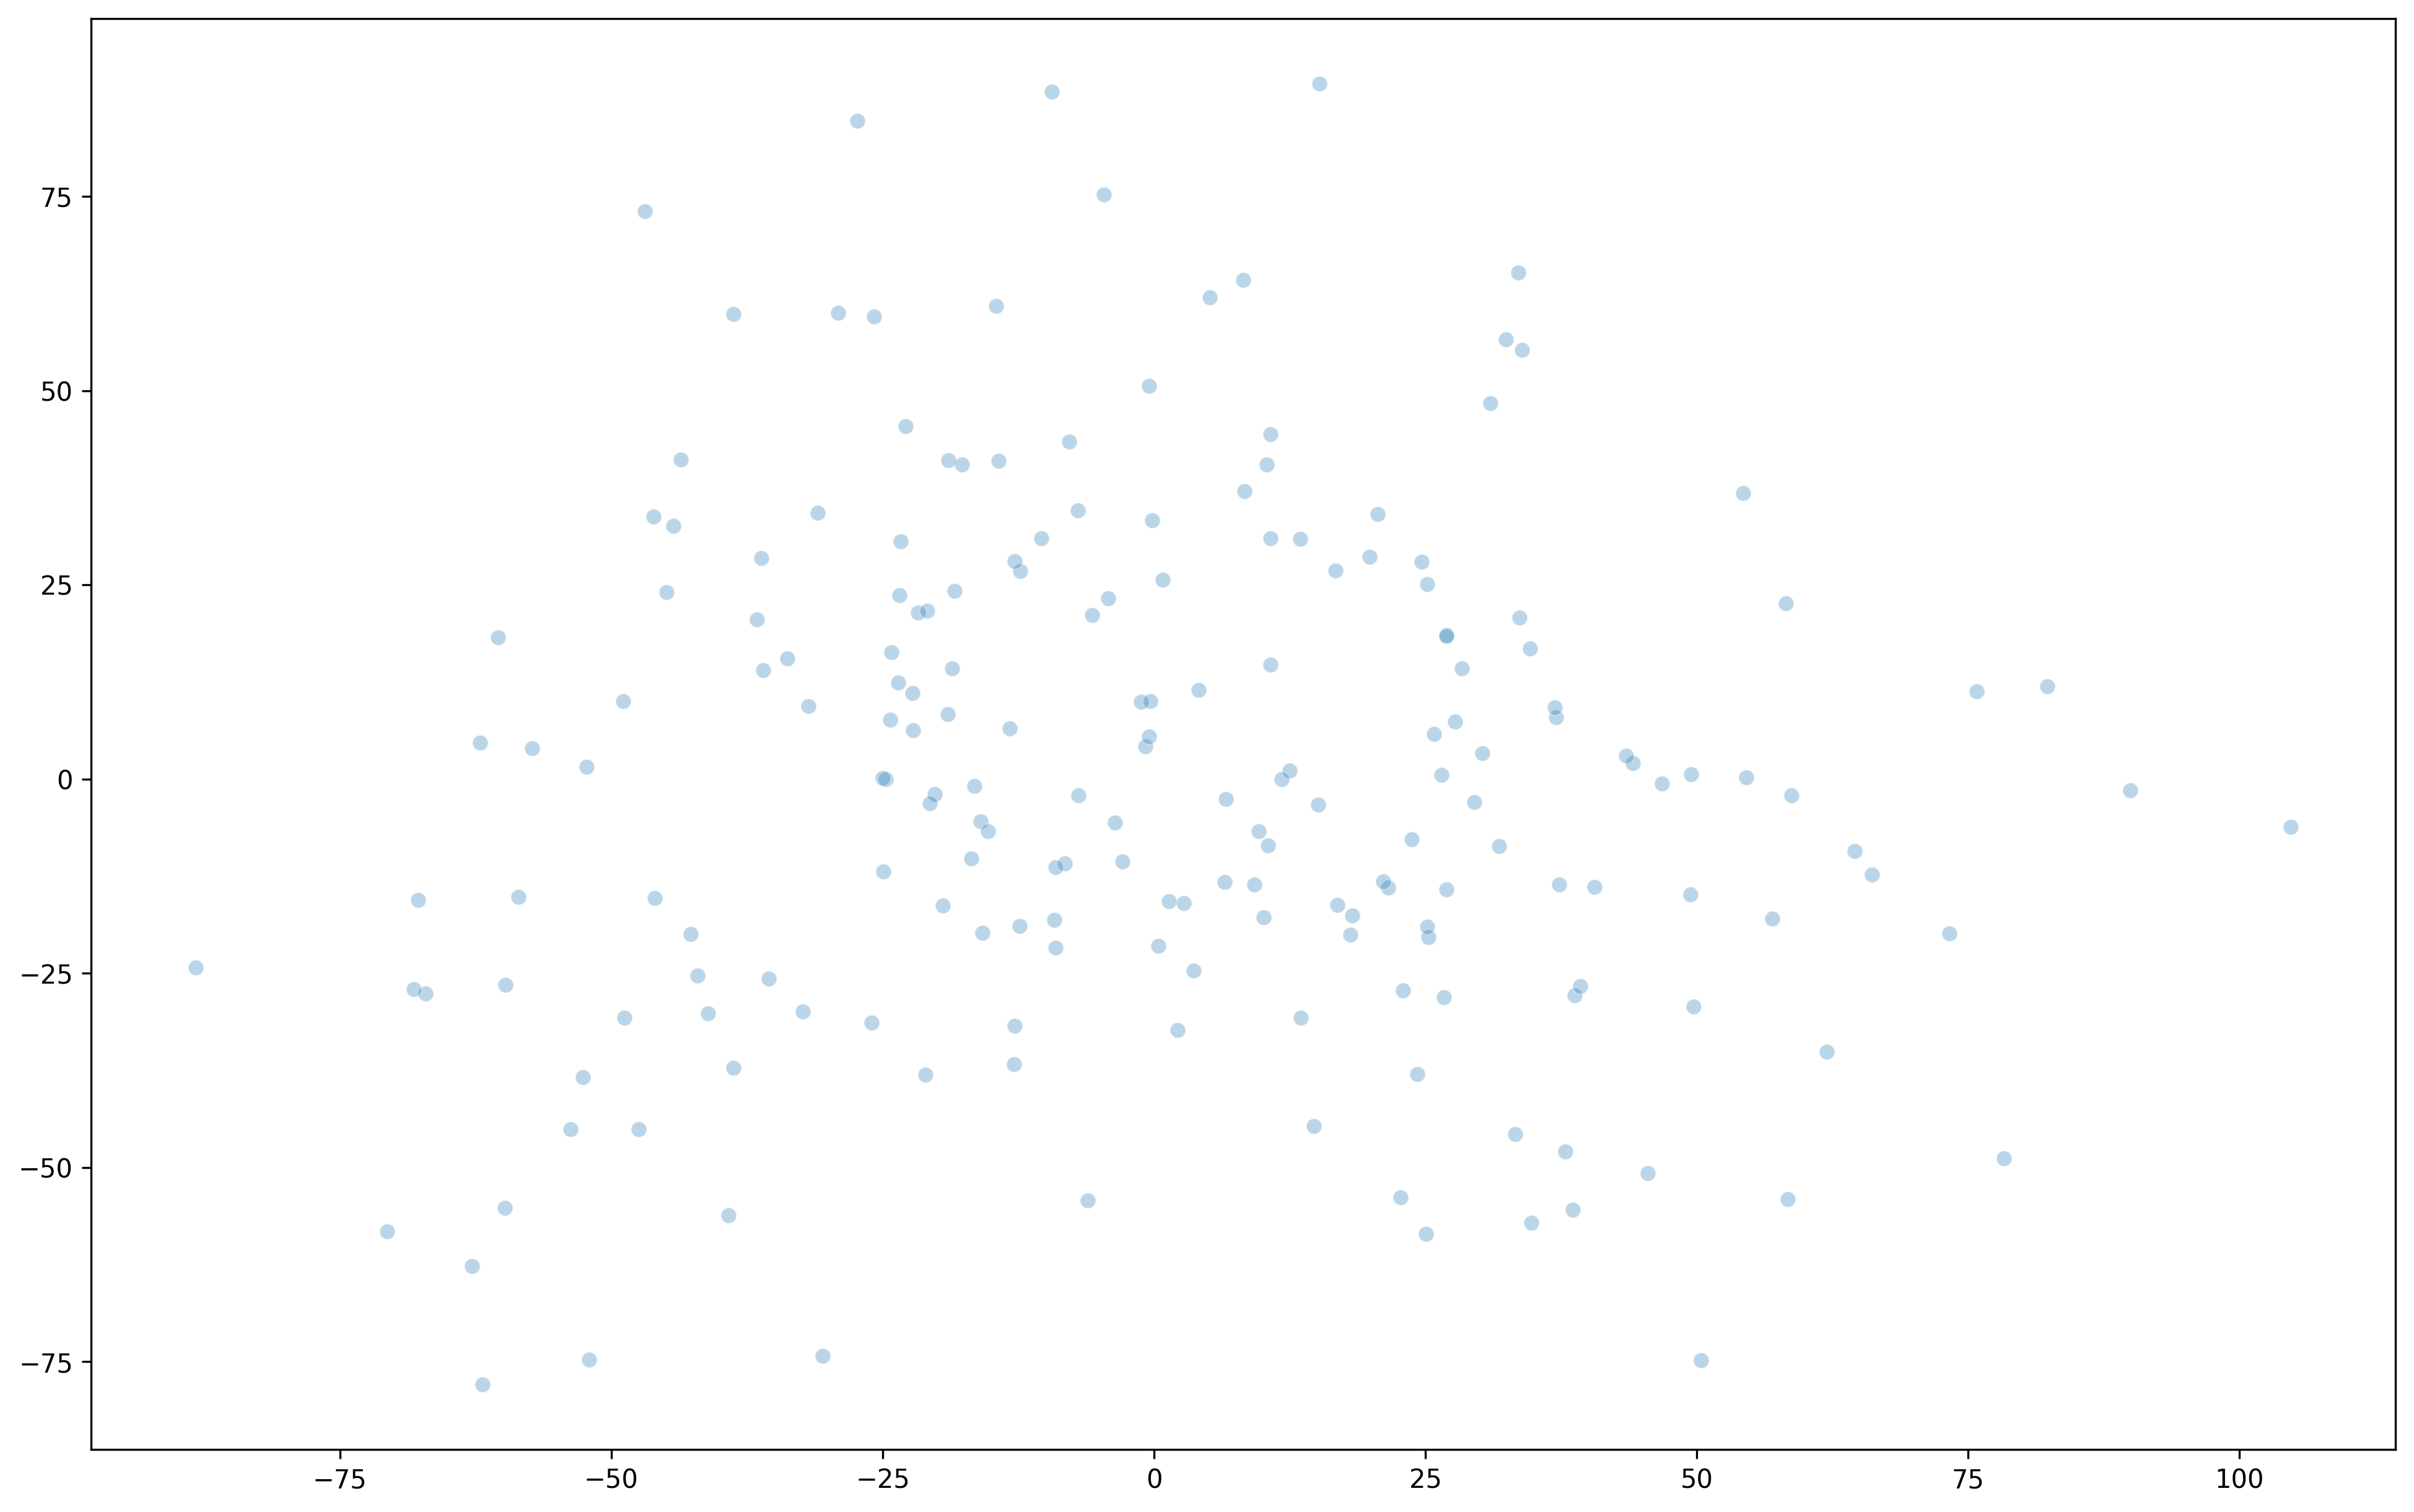

In [40]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=pca_result[:, 0], 
    y=pca_result[:, 1],
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=0.3
)

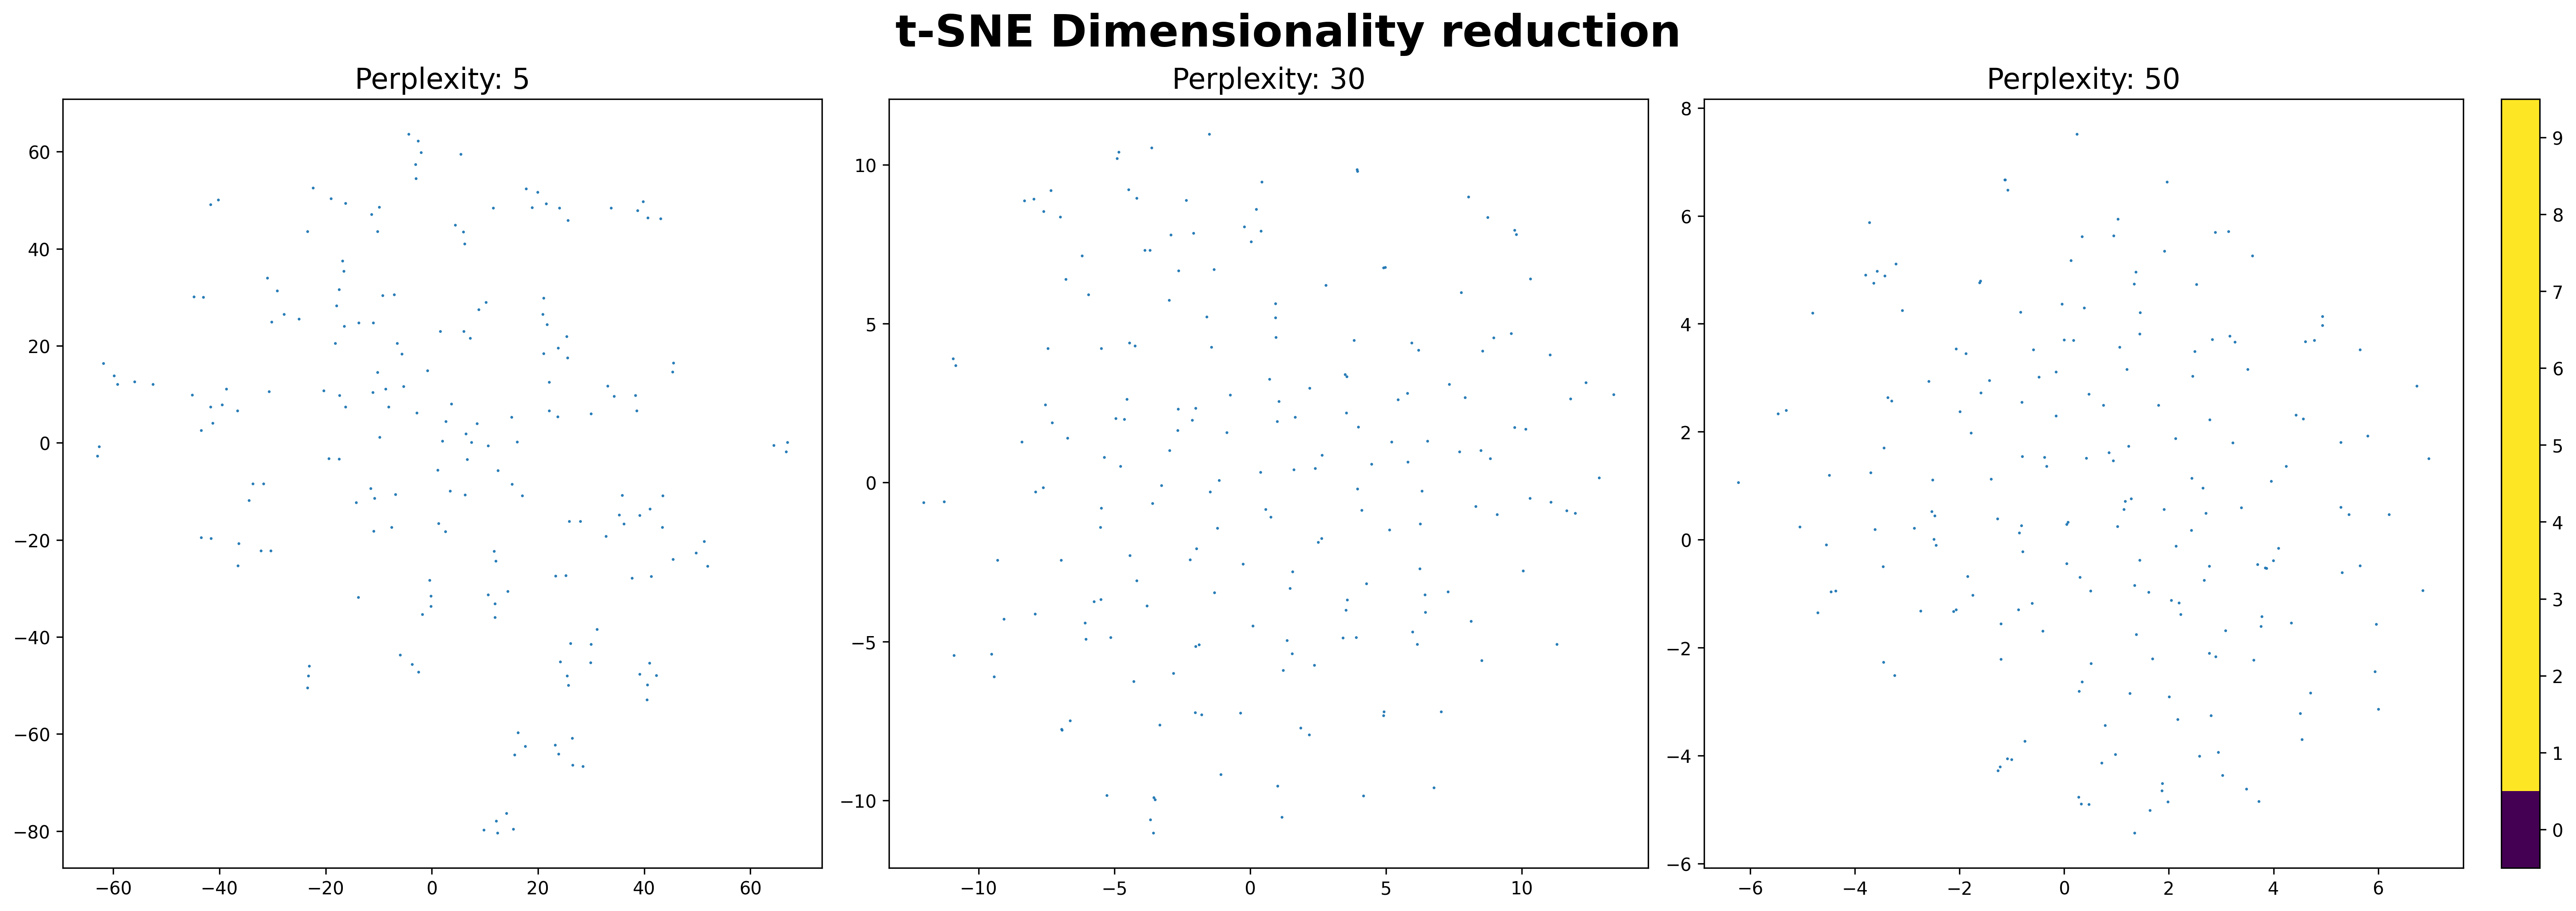

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(20,7), constrained_layout=True)



for c, per in zip([0, 1, 2], [5, 30, 50]):
    tsne = X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=per, random_state=1, n_iter=15000, metric="cosine").fit_transform(X)
    scatter = ax[c].scatter(tsne[:, 0], tsne[:, 1], s=0.3)
    ax[c].set_title(f'Perplexity: {per}', fontsize=16)    

fig.suptitle('t-SNE Dimensionality reduction', fontweight='bold', fontsize=25)
cbar = fig.colorbar(scatter, boundaries=np.arange(11)-0.5, location='right')
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(np.arange(10))
plt.show()

In [14]:
# Mean and variance on each (4096) embedding value 
var, mean = torch.var_mean(embeddings, dim=0)

print(len(mean))
print("mean, var")
for i in range(len(mean)):

    print(f"{mean[i]}".ljust(20, " ") , f"{var[i]}")

4096
mean, var
2.59765625           4.42578125
0.72119140625        4.7265625
2.12890625           6.04296875
-2.46484375          3.91796875
-1.5810546875        5.7890625
-2.390625            12.34375
-1.0166015625        6.46875
6.95703125           4.3359375
8.3984375            4.7734375
-0.71533203125       6.77734375
3.5078125            6.3203125
-0.1474609375        6.06640625
2.83203125           5.23046875
0.67919921875        5.7734375
2.01171875           5.56640625
-4.625               4.87109375
6.71484375           6.90234375
2.28515625           1.326171875
1.1904296875         5.37890625
-6.890625            1.3681640625
-4.64453125          4.73828125
-1.462890625         5.29296875
0.2156982421875      2.71875
-0.2841796875        6.203125
2.13671875           5.3984375
-0.728515625         5.8671875
0.5224609375         4.47265625
-5.4765625           6.52734375
0.06683349609375     5.6953125
2.34765625           5.0078125
1.001953125          6.796875
2.4609375   

In [ ]:
rebased_embeddings = embeddings - mean

# Mean and variance on each (4096) embedding value 
rvar, rmean = torch.var_mean(rebased_embeddings, dim=0)

print(len(mean))
print("mean, var")
for i in range(len(mean)):

    print(f"{rmean[i]}".ljust(25, " ") , f"{rvar[i]}")

torch.save(rebased_embeddings, f"rebased_embeddings-{id}.pth")


In [13]:
var, mean = torch.var_mean(embeddings, dim=1)

print(len(mean))
print("mean, var")
for i in range(len(mean)):

    print(f"{mean[i]}".ljust(20, " ") , f"{var[i]}")
    

195
mean, var
-0.1263427734375     21.640625
-0.046875            22.09375
-0.0924072265625     22.453125
-0.0521240234375     21.734375
-0.04144287109375    22.953125
-0.11566162109375    21.078125
-0.05743408203125    22.59375
-0.070068359375      21.75
-0.09442138671875    21.484375
-0.097900390625      21.296875
-0.076416015625      22.421875
-0.07867431640625    22.828125
-0.1387939453125     21.5
-0.0662841796875     23.09375
-0.07012939453125    20.65625
-0.0841064453125     22.59375
-0.0843505859375     22.828125
-0.04803466796875    22.953125
-0.0199432373046875  22.75
-0.119140625         21.125
-0.1593017578125     22.703125
-0.07330322265625    22.625
-0.08953857421875    21.5625
-0.1124267578125     22.203125
-0.16357421875       22.8125
-0.035797119140625   22.015625
-0.117919921875      21.609375
-0.1356201171875     21.984375
-0.108154296875      22.015625
-0.140380859375      22.53125
-0.06829833984375    21.84375
-0.1060791015625     22.71875
-0.0765380859375     22.7

In [8]:
embeddings  = torch.load(f"embeddings-1.pth")

# Label examples

# Embedd the task of finding a theme

queries_labels = [
    'adventure',
    'happiness',
    'friendship',
    'magic',
    "space",
    "exploration",
    "dragons",
    "knights",
    "investigation",
    "animals",
    "childhood",
    "disease",
    "princess",
    "dreams",
    "boys",
    "girls",
    "plants",
    "travel",
    "woods",
    "robots",
    "machines"
]

task = 'Given a theme in a story, retreive texts where the theme appears.'
queries = [get_detailed_instruct(task, i) for i in queries_labels]


theme_embeddings = embedd(queries).to("cuda")

scores = (theme_embeddings @ embeddings.T.to('cuda'))




# Step 1: Find the indices of the two highest values along the first dimension
values, indices = torch.topk(scores, 1, dim=0)

# Step 2: Create a new tensor filled with zeros
result = torch.zeros_like(scores)

# Step 3: Set the positions of the two highest values to 1
for idx in range(indices.size(1)):  # Loop over the second dimension
    result[indices[0][idx], idx] = 1
    
    
   
torch.save(result, f"one-hot-{id}.pth")

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
